# Clean and Analyse New York City SAT Scores

In this project we'll review, clean, merge and analyse several csv files which provide demographical and outcome data on Scholastic Aptitude Test (SAT) scores of students in New York City.  

The SAT is an exam that US high school students sit before they apply to colleges.  US colleges attribute a high weighting to these scores when deciding which students to admit.  The test consists of three sections, each of which has 800 possible points.  High schools are ranked by their average SAT scores and the scores may be used as a proxy for quality.  

The aim of this project is to evaluate whether students of particular demographics are disadvantaged with respect to their ability to perform well in their SATs, and ultimately obtain admissions to well regarded colleges.  

# Read in Data

In [1]:
# read in and title data

import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

# append df names and files to dictionary
for f in range(len(data_files)):
    d = pd.read_csv(data_files[f])
    key_name = data_files[f].replace(".csv","")
    data[key_name] = d


In [2]:
# read in surveys - survey data has unconventional delimiters and encoding
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding="windows-1252")
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding="windows-1252")


# Merge Data and Initial Exploration

In [3]:
# concatenate survey data
survey = pd.concat([all_survey, d75_survey], axis=0, sort=False)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey.shape

(1702, 2773)

# Filter Out Unnecessary Columns

There are over 2000 columns in the survey data, nearly all of which we don't need. Based on the data dictionary, only 23 of these columns are relevant.  

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.

Finally, the dbn column will need to be capitalised so that we can merge data on this value.

In [5]:
# Copy dbn column to DBN before we filter out:
survey["DBN"] = survey["dbn"]

survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", 
                 "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
                 "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# filter data by relevant columns
survey = survey.loc[:,survey_fields]

# add data to dictionary
data["survey"] = survey


In [6]:
data["sat_results"].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [7]:
for key in data:
    print(data[key].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

# Add DBN Column

The class_size df has the DBN split over multiple columns. We'll need to merge the data in these columns to create a DBN column. First we'll need to pad the CSD column to add a leading zero if the CSD is less than 10. Then we concatenate this value to the 'school code' to create a DBN.

In addition, the hs_directory df 'dbn' column needs to be capitalised.

In [8]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

In [9]:
# function pads the first component of the DBN with a leading zero if that component is less than 10
def convert_csd(num):
    num = str(num)
    if len(num) == 1:
        return num.zfill(2)
    else:
        return num

# create new column padded_csd by applying convert_csd function to CSD column
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(convert_csd) 

data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]



In [10]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [11]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [12]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


# Calculate SAT Scores

##### Comment
Next we'll create a sat_score column in the sat_results df, which will contain the combined SAT score for each student. Note that these are string data types so they'll first need to be converted to numeric data types.

In [13]:
cols = ["SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score"]

for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")
    
data["sat_results"]["sat_score"] = data["sat_results"][cols[0]] + data["sat_results"][cols[1]] + data["sat_results"][cols[2]]

In [14]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [1]:
data['hs_directory'].head()

NameError: name 'data' is not defined

# Extract Latitude and Longitude Data

The hs_directory df has latitude and longitude data embeded in the 'Location 1' column.  We'll extract this and convert it to a numeric data type. 

In [16]:
import re

def extract_latitude(location):
    coordinates = re.findall("\(.+\)", location)
    latitude = coordinates[0].split(",")[0].replace("(","")
    return latitude

# Store latitude data in its own column and convert to numeric
data["hs_directory"]["lat"] = data['hs_directory']['Location 1'].apply(extract_latitude)
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")

In [17]:
def extract_longitude(location):
    coordinates = re.findall("\(.+\)", location)
    latitude = coordinates[0].split(",")[1].replace(")","")
    return latitude

# Store longitude data in its own column and convert to numeric
data["hs_directory"]["long"] = data['hs_directory']['Location 1'].apply(extract_longitude)
data["hs_directory"]["long"] = pd.to_numeric(data["hs_directory"]["long"], errors="coerce")

In [18]:
data["hs_directory"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,long
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend ...,21K540,40.589238,-73.981747
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685...",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,15K429,40.685452,-73.993491
2,24Q530,International High School at LaGuardia Communi...,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,"45 35 Van Dam Street\nLong Island City, NY 111...",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth ...,24Q530,40.744150,-73.933627
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,"509 West 129 Street\nNew York, NY 10027\n(40.8...",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville ...,05M367,40.815230,-73.955201
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,27Q260,40.601989,-73.762834


# Filter Out Data Not Related to High School Students

In the class size data below, the first few rows indicate the DBN is appearing more than once. This is because each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE AND 9-12 ONLY) and CORE COURSE(MS CORE AND 9-12 ONLY).

If we look at the unique values for GRADE in the cell beneath, we have data for every grade, but we're only interested in rows where the value is 09-12.

Lastly, the GEN ED is the most common PROGRAM TYPE, so we'll only select rows where this is the case.



In [19]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [20]:
data["class_size"]["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [21]:
data["class_size"]["PROGRAM TYPE"].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

In [22]:
class_size = data["class_size"]

# filter grade by only high school grades
class_size = class_size[class_size["GRADE "] == '09-12']

# filter program type to only include GEN ED
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [23]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


# Impute Class Size Data

DBN still isn't unique because of the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns. The unique values of CORE SUBJECT (MS CORE and 9-12 ONLY) are 'ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES', and appears only to include certain subjects.  

A fair compromise may be to take the average across all of the classes a school offers.  Then we will achieve unique DBN values while incorporating as much data as possible into the average.  

In [24]:
import numpy as np

class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


# Filter Out Older Data

The demographics data does not have a unique DBN because it contains rows for several years.  Because 2012 is the most recent data, we'll filter our rows by this value

In [25]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [26]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

The graduation df does not contain unique DBN values because there are multiple years of data and is split up my multiple demographics.  We'll select only the most recent data (2006) and select only Total Cohort.

In [27]:
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [28]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == '2006']
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == 'Total Cohort']

data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


The ap_2010 df contains the Advanced Placement test scores in string format. We'll convert these to numeric data types. 

In [29]:
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [30]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for c in cols:
    data["ap_2010"][c] = pd.to_numeric(data["ap_2010"][c], errors = "coerce")
        


In [31]:
data["sat_results"].shape

(478, 7)

# Merge Data

Both the ap_2010 and graduation data sets have many missing DBN values, so a left join is appropriate (we don't want to lose  too many rows).  The remainder of the DFs have DBN values almost identical to sat_results, so we can afford to use an inner join and therefore minimize missing data in the added columns.

In [32]:
combined = data["sat_results"]
combined = pd.merge(left = combined, right = data["ap_2010"], on='DBN', how = "left")
combined = pd.merge(left = combined, right = data["graduation"], on="DBN", how = "left")
combined = pd.merge(left = combined, right = data["class_size"], on="DBN", how = "inner")
combined = pd.merge(left = combined, right = data["demographics"], on="DBN", how = "inner")
combined = pd.merge(left = combined, right = data["survey"], on="DBN", how = "inner")
combined = pd.merge(left = combined, right = data["hs_directory"], on="DBN", how = "inner")

In [33]:
combined.shape

(363, 165)

# Impute Missing Data

In [34]:
# fill missing values with the mean of the column. Fill any remaining missing values with 0

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,long
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [35]:
# create a new column in combined which contains the school district for each row

def get_district(DBN):
    return DBN[:2]

combined["school_dist"] = combined["DBN"].apply(get_district)

In [36]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,long,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426,01


# Correlation

In [37]:
correlations = combined.corr()

correlations['sat_score'].sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Total Regents - % of cohort             0.667603
white_per                               0.620718
Total Grads - % of cohort               0.584234
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Total Regents - % of grads              0.494732
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num          

Unsurprisingly, SAT Writing Avg. Score, SAT Critical Reading Avg. Score and SAT Math Avg. Score have near perfect positive correlations with sat_score.

There is significant racial inequality in SAT scores (white_per is moderately positively correlated with sat_score, where has hispanic_per is moderately negatively correlated). 

Interestingly, total_enrollment has a moderate positive correlation, indicating that larger schools tend to do better in the SAT. 

In [38]:
correlations['sat_score'].loc['total_enrollment']

0.36785691698802886

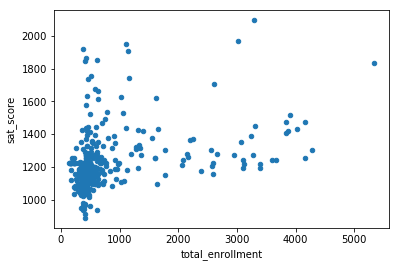

In [39]:
import matplotlib.pyplot as plt

combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

Reviewing the above plot, it doesn't appear that there's a particularly strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [40]:
# Filter df to keep only rows where total_enrollment < 1000 and sat_score < 1000
low_enrollment = combined[(combined['total_enrollment']<1000) & (combined['sat_score']<1000)]
low_enrollment

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,long,school_dist
91,07X334,INTERNATIONAL COMMUNITY HIGH SCHOOL,34,310.0,324.0,311.0,945.0,0,129.028846,197.038462,...,"345 Brook Avenue\nBronx, NY 10454\n(40.8100361...",1.0,8.0,41.0,2000391.0,2.022860e+09,Mott Haven-Port Morris ...,40.810036,-73.917812,07
125,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,Academy for Language and Technology,20.000000,20.000000,...,"1700 Macombs Road\nBronx, NY 10453\n(40.849102...",5.0,14.0,21502.0,2008460.0,2.028660e+09,University Heights-Morris Heights ...,40.849102,-73.916088,09
126,09X403,BRONX INTERNATIONAL HIGH SCHOOL,49,314.0,312.0,339.0,965.0,0,129.028846,197.038462,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,40.827603,-73.904475,09
139,10X268,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,52,304.0,356.0,302.0,962.0,Kingsbridge International High School,32.000000,37.000000,...,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",7.0,11.0,409.0,2015241.0,2.032470e+09,Van Cortlandt Village ...,40.870377,-73.898163,10
141,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300.0,333.0,301.0,934.0,International School for Liberal Arts,55.000000,73.000000,...,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",7.0,11.0,409.0,2015241.0,2.032470e+09,Van Cortlandt Village ...,40.870377,-73.898163,10
176,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321.0,351.0,298.0,970.0,0,129.028846,197.038462,...,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",9.0,18.0,56.0,2027459.0,2.038640e+09,West Farms-Bronx River ...,40.831366,-73.878823,12
179,12X550,HIGH SCHOOL OF WORLD CULTURES,42,304.0,323.0,312.0,939.0,0,129.028846,197.038462,...,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",9.0,18.0,56.0,2027459.0,2.038640e+09,West Farms-Bronx River ...,40.831366,-73.878823,12
188,13K439,BROOKLYN INTERNATIONAL HIGH SCHOOL,90,305.0,364.0,312.0,981.0,0,129.028846,197.038462,...,"49 Flatbush Avenue Extension\nBrooklyn, NY 112...",2.0,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,40.697175,-73.984960,13
225,17K524,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,71,287.0,335.0,291.0,913.0,0,129.028846,197.038462,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,40.670299,-73.961648,17
237,18K563,IT TAKES A VILLAGE ACADEMY,56,313.0,320.0,330.0,963.0,0,129.028846,197.038462,...,"5800 Tilden Avenue\nBrooklyn, NY 11203\n(40.64...",17.0,45.0,936.0,3104598.0,3.047420e+09,Rugby-Remsen Village ...,40.648664,-73.921899,18


If we review the names of the schools which exist in the bottom left and corner of the cluster, the majority of these schools are 'international schools' which serve new immigrants, including many who cannot read or write in their native language. This indicates that it is actually ell_percent which correlates strongly with sat_score, rather than total_enrollment.

In [41]:
correlations['sat_score'].loc['ell_percent']

-0.39874973220851989

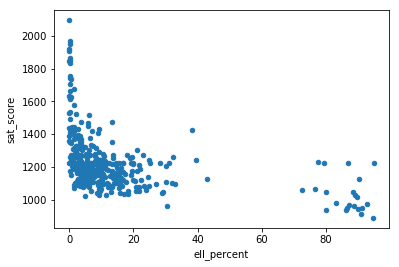

In [42]:
combined.plot.scatter(x="ell_percent", y="sat_score")
plt.show()

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot appears more linear.  There remains a cluster of schools which have very high ell_percent values and low sat_score values.  This cluster represents the group of international schools in the df some cells above.

We'll explore this relationship using Basemap

# Overlay Data Against NYC Map

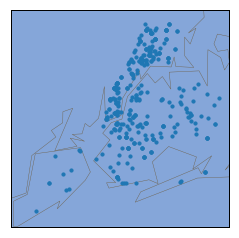

In [43]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

# convert airport latitude and longitudes to list
longitudes = combined['long'].tolist()
latitudes = combined['lat'].tolist()

x, y = m(longitudes,latitudes)

m.scatter(x,y, s=10, zorder=2)
plt.show()

The map above shows that school density is highest at the top of the map (Manhattan), when compared to Brooklyn, Queens, the Bronx and Staten Island.  We can assign a different colour depending on the proportion of English Language Learners using the summer colournap, which results in green points for low numbers and yellow points for high numbers.

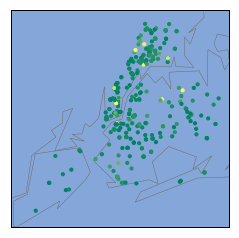

In [44]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

# convert airport latitude and longitudes to list
longitudes = combined['long'].tolist()
latitudes = combined['lat'].tolist()

x, y = m(longitudes,latitudes)

# c parameter assigns values ranging from 0 to 1. Green => low ell_percent; yellow => high ell_percent. 
m.scatter(x,y, s=10, zorder=2, c=combined["ell_percent"], cmap='summer')
plt.show()

The large number of schools makes it difficult to interpret this map. It looks like uptown Manhattan and parts of Queens have a higher ell_percent.  To verify this, we'll aggregate the data by school district. 

In [45]:
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)

districts.head()


,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,long
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,75.453574,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,74.029937,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,75.200881,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


Now that we have the means of all the columns, we can plot out ell_percent by district.  The means of the longitude and latitude columns will give us the coordinates of the centre of each district.

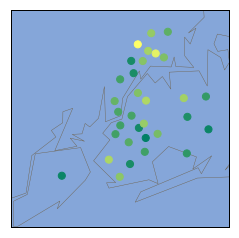

In [46]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

# convert airport latitude and longitudes to list
longitudes = districts['long'].tolist()
latitudes = districts['lat'].tolist()

x, y = m(longitudes,latitudes)

# c parameter assigns values ranging from 0 to 1. Green => low ell_percent; yellow => high ell_percent. 
m.scatter(x,y, s=50, zorder=2, c=districts["ell_percent"], cmap="summer")

plt.show()

The graphic above indicates that high ell_percent schools tend to be in the northern parts of Queens and the Bronx. 

# Plotting survey correlations

In [47]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

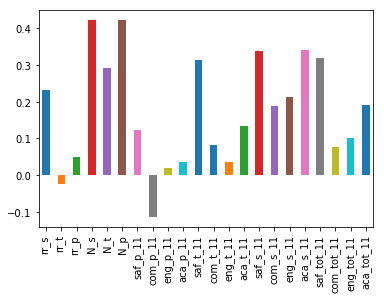

In [48]:
%matplotlib inline
correlations['sat_score'].loc[survey_fields].plot.bar()
plt.show()

There are moderate correlations between N_s (number of student respondents), N_p (number of parent respondents) and sat_score.  Since these columns are strongly correlated with total_enrollment, it makes sense that they would be high (see cell below). 

There is a weak correlation with rr_s (student response rate) and SAT scores.  I infer that students who are likely to complete surveys are also likely to be performing well academically.  

A moderate correlation exists between how students and teachers percieved safety (saf_s_11 and saf_t_11). Intuitively this makes sense because it is challenging to learn or teach in an unsafe environment. 

In [49]:
correlations['sat_score'].loc[survey_fields].sort_values(ascending=False)

N_s           0.423463
N_p           0.421530
aca_s_11      0.339435
saf_s_11      0.337639
saf_tot_11    0.318753
saf_t_11      0.313810
N_t           0.291463
rr_s          0.232199
eng_s_11      0.213822
aca_tot_11    0.190966
com_s_11      0.187370
aca_t_11      0.132348
saf_p_11      0.122913
eng_tot_11    0.100102
com_t_11      0.082419
com_tot_11    0.077310
rr_p          0.047925
eng_t_11      0.036906
aca_p_11      0.035155
eng_p_11      0.020254
rr_t         -0.023386
com_p_11     -0.115073
Name: sat_score, dtype: float64

In [50]:
correlations['total_enrollment'].loc[survey_fields].sort_values(ascending=False)

N_t           0.956367
N_s           0.951915
N_p           0.799984
com_t_11      0.108651
eng_t_11      0.074538
saf_t_11      0.070067
aca_t_11      0.058931
eng_tot_11   -0.031677
eng_s_11     -0.032795
saf_s_11     -0.049445
rr_t         -0.062685
aca_s_11     -0.072103
aca_tot_11   -0.086291
saf_tot_11   -0.104151
com_tot_11   -0.108784
rr_s         -0.116814
com_s_11     -0.184316
rr_p         -0.205189
eng_p_11     -0.239826
aca_p_11     -0.315744
saf_p_11     -0.364685
com_p_11     -0.398817
Name: total_enrollment, dtype: float64

# Exploring safety

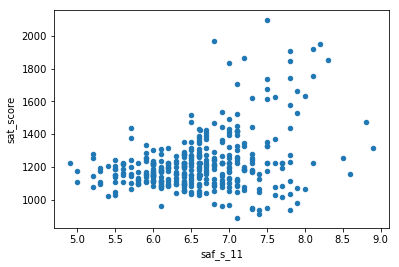

In [51]:
# scatter plot of student perceived safety and SAT score 
combined.plot.scatter(x="saf_s_11", y="sat_score")
plt.show()

The scatter plot shows that there are a handful of schools with high safety scores and extremely high SAT scores.  There are a small number of schools that do not have high SAT scores despite high perceived safety.  There are no schools with a safety score of below 6.5 that has an average SAT score greater than approximately 1500. 

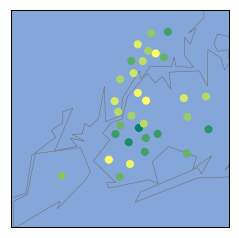

In [52]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

# convert airport latitude and longitudes to list
longitudes = districts['long'].tolist()
latitudes = districts['lat'].tolist()

x, y = m(longitudes,latitudes)

# c parameter assigns values ranging from 0 to 1. Green => low perceived student safety; yellow => high student safety. 
m.scatter(x,y, s=50, zorder=2, c=districts["saf_s_11"], cmap="summer")

plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.



# Exploring Race

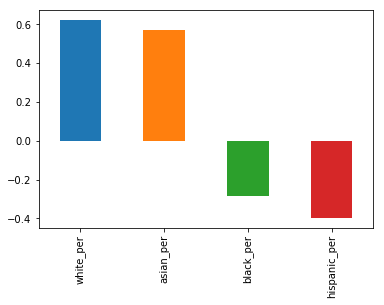

In [53]:
race_fields = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

correlations['sat_score'].loc[race_fields].plot.bar()
plt.show()

The bar graph of the correlation between the proportion of a particular racial group and SAT scores indicates a positive, moderate correlation for whites and asians, a moderate negative correlation between hispanics and SAT scores, and a weak correlation for blacks. The latter may be due to lack of funding for schools in particular areas, which are more likely to have a higher proportion of black or hispanic students. We'll explore the relationship between hispanics and SAT scores in greater detail.

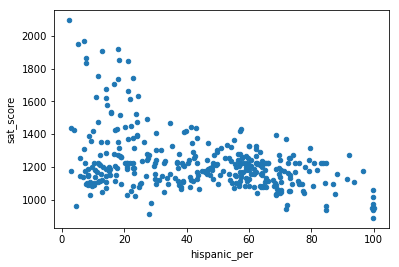

In [54]:
# scatter plot of student perceived safety and SAT score 
combined.plot.scatter(x="hispanic_per", y="sat_score")
plt.show()

The scatter plot indicates that the schools with the highest SAT scores are those with the lowest proportion of hispanic students.  There are no schools with an average SAT score greater than about 1400 if the hispanic population is greater than 40%.

In [57]:
# list of school names where hispanics represent greater than 95% of the student population
combined[combined['hispanic_per']>95]['SCHOOL NAME']

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.



In [61]:
# list of school names where hispanics repesent less than 10% of student population and mean SAT scores > 1800
combined[(combined['hispanic_per']<10) & (combined['sat_score'] > 1800)]['SCHOOL NAME']

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

# Exploring Gender

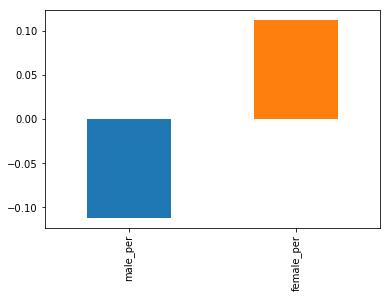

In [62]:
gender_fields = ["male_per", "female_per"]

correlations['sat_score'].loc[gender_fields].plot.bar()
plt.show()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is particularly strong.



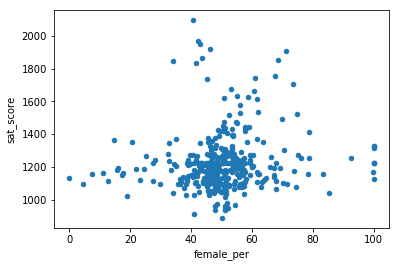

In [63]:
# scatter plot of female percentage of student population and SAT score 
combined.plot.scatter(x="female_per", y="sat_score")
plt.show()

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.



In [67]:
# school names for those with greater than 60% female students and SAT scores greater than 1700
combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"]

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

These schools appears to be very selective liberal arts schools that have high academic standards.

# AP Exam Scores and SAT Scores

Finally, we'll examine whether the proportion of students who undertook AP exams correlates with SAT scores

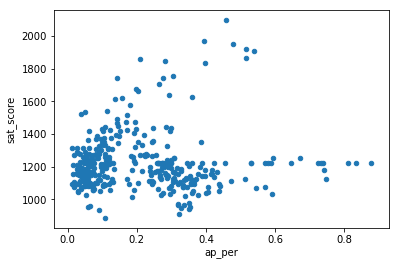

In [72]:
# calculate percentage of AP Test Takers and assign to column 'ap_per'
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score')


There appears to be a very weak positive correlation with the proportion of AP test takers and SAT scores. 